In [42]:
#paste the scenerio here

In [43]:
# two things here, categorical and regression i.e TArget condition is our response for cat i.e yes or no      and Recovery days is our response

In [44]:
### Import Necessary Libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Load the Dataset

In [47]:
data = pd.read_csv("Patient_Diagnostics_Dataset.csv", index_col="Patient_ID")

In [48]:
data.head(10)

,Age,Gender,Smoking_Status,Activity_Level,Existing_Conditions,Family_History,Blood_Pressure,Cholesterol_Level,Heart_Rate,Glucose_Level,Diagnosis,Target_Condition,Recovery_Days
Patient_ID,,,,,,,,,,,,,
1,69,Male,Non-Smoker,High,NaN,Yes,143,170,112,166,Condition_B,Yes,34
2,32,Male,Smoker,Low,Diabetes,No,105,184,72,137,Condition_C,No,42
3,89,Male,Smoker,Low,Hypertension,Yes,124,253,119,127,Condition_A,No,25
4,78,Male,Smoker,High,Hypertension,No,164,203,119,175,Condition_C,Yes,31
5,38,Male,Smoker,High,NaN,No,176,273,68,123,Condition_D,No,31
6,41,Male,Non-Smoker,Medium,Hypertension,No,119,257,73,154,Condition_D,Yes,32
7,20,Female,Non-Smoker,High,NaN,No,137,193,76,117,Condition_C,Yes,31
8,39,Male,Non-Smoker,High,Heart Disease,No,158,234,94,174,Condition_A,No,25
9,70,Male,Smoker,Medium,Hypertension,Yes,97,153,77,170,Condition_C,Yes,37


In [49]:
# because patient id is not relevant, i want to make it the index instead of dropping it

### EDA

In [51]:
data.columns

Index(['Age', 'Gender', 'Smoking_Status', 'Activity_Level',
       'Existing_Conditions', 'Family_History', 'Blood_Pressure',
       'Cholesterol_Level', 'Heart_Rate', 'Glucose_Level', 'Diagnosis',
       'Target_Condition', 'Recovery_Days'],
      dtype='object')

In [52]:
data.info() # here, there is missing data in Existing condition

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 1 to 9000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  9000 non-null   int64 
 1   Gender               9000 non-null   object
 2   Smoking_Status       9000 non-null   object
 3   Activity_Level       9000 non-null   object
 4   Existing_Conditions  6746 non-null   object
 5   Family_History       9000 non-null   object
 6   Blood_Pressure       9000 non-null   int64 
 7   Cholesterol_Level    9000 non-null   int64 
 8   Heart_Rate           9000 non-null   int64 
 9   Glucose_Level        9000 non-null   int64 
 10  Diagnosis            9000 non-null   object
 11  Target_Condition     9000 non-null   object
 12  Recovery_Days        9000 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 984.4+ KB


In [53]:
data.describe()

,Age,Blood_Pressure,Cholesterol_Level,Heart_Rate,Glucose_Level,Recovery_Days
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,53.539778,133.792111,225.208556,89.466667,134.583667,29.308778
std,20.727967,26.072740,43.303527,17.193576,37.482873,9.984970
min,18.000000,90.000000,150.000000,60.000000,70.000000,-7.000000
25%,36.000000,111.000000,188.000000,75.000000,102.000000,23.000000
50%,53.000000,134.000000,226.000000,89.000000,135.000000,29.000000
75%,72.000000,156.000000,263.000000,104.000000,167.000000,36.000000
max,89.000000,179.000000,299.000000,119.000000,199.000000,66.000000


In [54]:
data.describe(include="object")

,Gender,Smoking_Status,Activity_Level,Existing_Conditions,Family_History,Diagnosis,Target_Condition
count,9000,9000,9000,6746,9000,9000,9000
unique,2,2,3,3,2,4,2
top,Female,Non-Smoker,Low,Hypertension,No,Condition_B,Yes
freq,4550,4541,3108,2329,4591,2295,4565


#### Data Preprocessing
Data preprocessing in machine learning is a critical step that involves preparing raw data to make it suitable for modeling. 
It transforms data into a clean, structured, and ready-to-use format, enabling algorithms to train more efficiently and produce 
accurate predictions. Preprocessing can include cleaning, transforming, and reducing data, among other steps.


### Handling missing Data & Data Cleaning

In [57]:
# Check for missing Data

missing_values = data.isnull().sum()

missing_values

Age                       0
Gender                    0
Smoking_Status            0
Activity_Level            0
Existing_Conditions    2254
Family_History            0
Blood_Pressure            0
Cholesterol_Level         0
Heart_Rate                0
Glucose_Level             0
Diagnosis                 0
Target_Condition          0
Recovery_Days             0
dtype: int64

In [58]:
# Percentage of missing data

missing_data_percentage = (missing_values/len(data))* 100

missing_data_percentage

Age                     0.000000
Gender                  0.000000
Smoking_Status          0.000000
Activity_Level          0.000000
Existing_Conditions    25.044444
Family_History          0.000000
Blood_Pressure          0.000000
Cholesterol_Level       0.000000
Heart_Rate              0.000000
Glucose_Level           0.000000
Diagnosis               0.000000
Target_Condition        0.000000
Recovery_Days           0.000000
dtype: float64

In [59]:
# Apply imputation of Mode to fill in missing values in Existing_condition column

mode_value = data["Existing_Conditions"].mode()[0] #peradventure, the reason for indexx 0, if there are same values of mode, pick the first one

mode_value

'Hypertension'

In [60]:
# Filling Missing values with "Hypertension". 

data.fillna({"Existing_Conditions": "Hypertension"}, inplace=True)

In [61]:
data.isnull().sum()

Age                    0
Gender                 0
Smoking_Status         0
Activity_Level         0
Existing_Conditions    0
Family_History         0
Blood_Pressure         0
Cholesterol_Level      0
Heart_Rate             0
Glucose_Level          0
Diagnosis              0
Target_Condition       0
Recovery_Days          0
dtype: int64

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 1 to 9000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  9000 non-null   int64 
 1   Gender               9000 non-null   object
 2   Smoking_Status       9000 non-null   object
 3   Activity_Level       9000 non-null   object
 4   Existing_Conditions  9000 non-null   object
 5   Family_History       9000 non-null   object
 6   Blood_Pressure       9000 non-null   int64 
 7   Cholesterol_Level    9000 non-null   int64 
 8   Heart_Rate           9000 non-null   int64 
 9   Glucose_Level        9000 non-null   int64 
 10  Diagnosis            9000 non-null   object
 11  Target_Condition     9000 non-null   object
 12  Recovery_Days        9000 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 984.4+ KB


### Univariate Analysis of numerical data

In [64]:
numerical_data = data.select_dtypes(exclude="object")

numerical_data.drop(columns="Recovery_Days",inplace=True)
numerical_data

,Age,Blood_Pressure,Cholesterol_Level,Heart_Rate,Glucose_Level
Patient_ID,,,,,
1,69,143,170,112,166
2,32,105,184,72,137
3,89,124,253,119,127
4,78,164,203,119,175
5,38,176,273,68,123
...,...,...,...,...,...
8996,70,90,171,81,160
8997,47,171,255,60,108
8998,20,115,179,98,98


In [65]:
# drop recovery date because its a response variable, that's our target, as at this point, it is not important

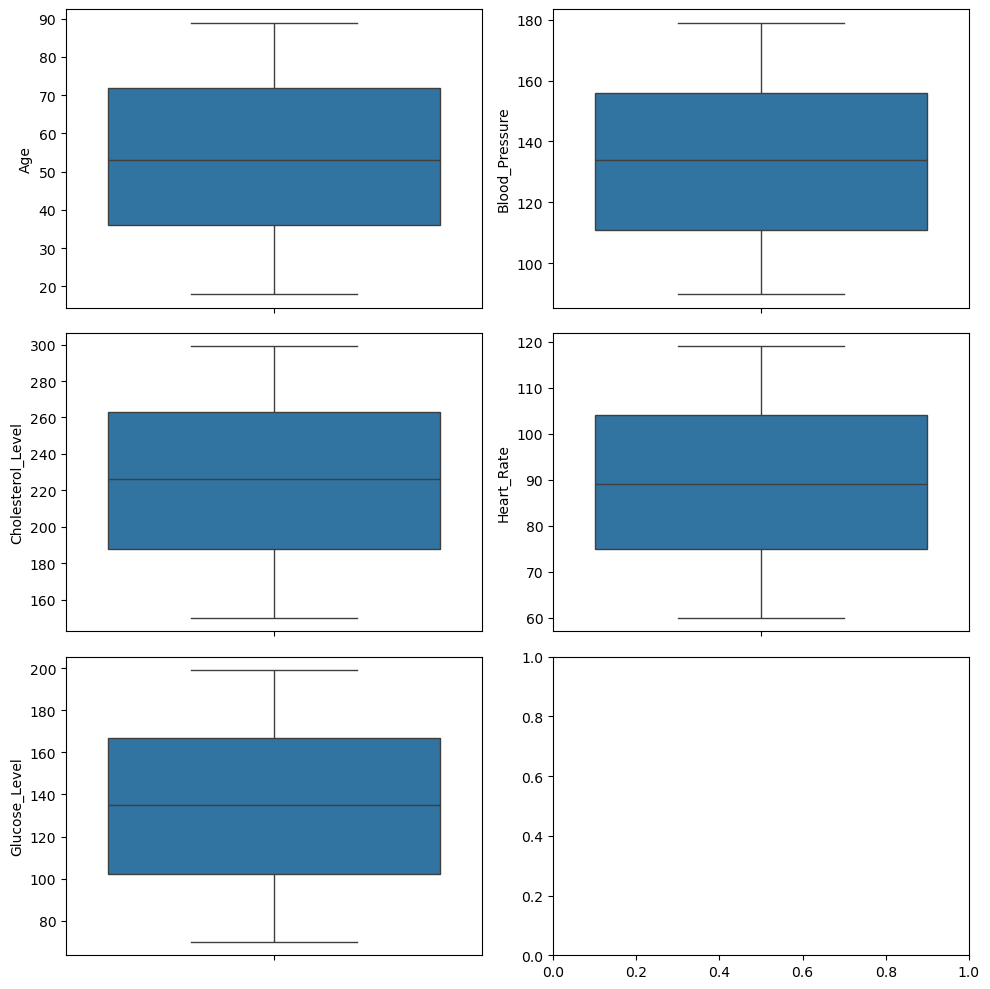

In [66]:
# Use Box plot to visualize numerical data


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
ax = axes.flatten()

for index, column_name in enumerate(numerical_data):
    sns.boxplot(data[column_name], ax=ax[index])

plt.tight_layout()
plt.show()

### label Encoding
Label encoding is a technique in machine learning used to convert categorical data (non-numeric data) into a numerical format so algorithms can process it. This is necessary because many machine learning algorithms only work with numerical inputs.

In [68]:
# Create a list of all columns with categorical data


cat_columns = ["Gender", "Smoking_Status", "Activity_Level", "Existing_Conditions", "Family_History", "Diagnosis", "Target_Condition"]

encoder = LabelEncoder()


for column_name in cat_columns: 
    data[column_name] = encoder.fit_transform(data[column_name])

data.head(10)

,Age,Gender,Smoking_Status,Activity_Level,Existing_Conditions,Family_History,Blood_Pressure,Cholesterol_Level,Heart_Rate,Glucose_Level,Diagnosis,Target_Condition,Recovery_Days
Patient_ID,,,,,,,,,,,,,
1,69,1,0,0,2,1,143,170,112,166,1,1,34
2,32,1,1,1,0,0,105,184,72,137,2,0,42
3,89,1,1,1,2,1,124,253,119,127,0,0,25
4,78,1,1,0,2,0,164,203,119,175,2,1,31
5,38,1,1,0,2,0,176,273,68,123,3,0,31
6,41,1,0,2,2,0,119,257,73,154,3,1,32
7,20,0,0,0,2,0,137,193,76,117,2,1,31
8,39,1,0,0,1,0,158,234,94,174,0,0,25
9,70,1,1,2,2,1,97,153,77,170,2,1,37


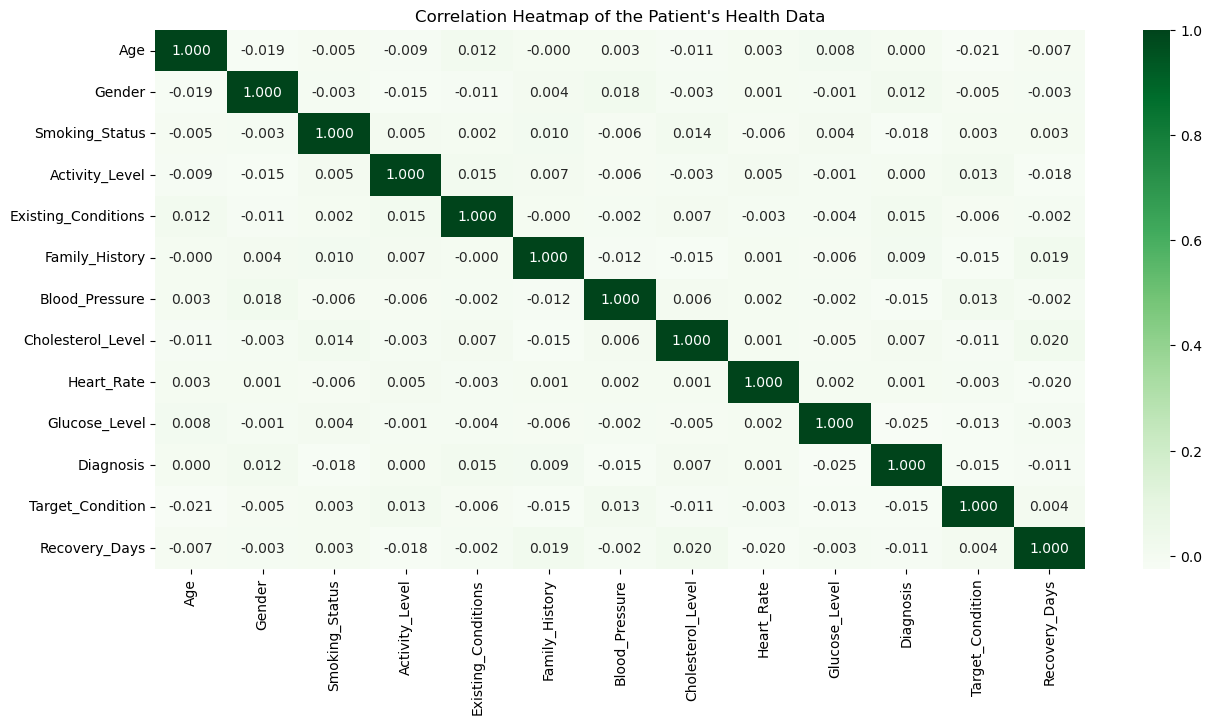

In [69]:
# Correlation Map showing the relationships between features(independent) and target(dependent variables or rsponse variables)

plt.figure(figsize=(15,7))

sns.heatmap(data.corr(), annot=True, fmt=".3f", cmap="Greens")

plt.title("Correlation Heatmap of the Patient's Health Data")
plt.show()

In [70]:
# age and target condition is -0.021 , so there sno correlation, it s not a strong determinant that  someone wil have a disease
# negative means its moving in oppositite direction, as age is increasing, the other variable is decreasing
# the strenght is weak even though its positive 0.003, increase in having a condition
# age and recovery days, -0.007, weak, slight chance as as patient increase in age, it will take a longer time to recover

### Scaling Features
Scaling in machine learning is a preprocessing technique used to adjust the range and distribution of numerical data, bringing features to a comparable scale.

In [72]:
# we do encoding for categorical and scaling for numerical data

In [73]:
#create a copy of my data, i dont want to alter the original data


data2 = data.copy(deep=True)

In [74]:
# create a list of numerical columns to be scaled

scaler = StandardScaler()

numerical_cols = ["Age","Blood_Pressure", "Cholesterol_Level", "Heart_Rate", "Glucose_Level", "Recovery_Days"]

data2[numerical_cols] = scaler.fit_transform(data2[numerical_cols])

data2.head(10)

,Age,Gender,Smoking_Status,Activity_Level,Existing_Conditions,Family_History,Blood_Pressure,Cholesterol_Level,Heart_Rate,Glucose_Level,Diagnosis,Target_Condition,Recovery_Days
Patient_ID,,,,,,,,,,,,,
1,0.745904,1,0,0,2,1,0.353181,-1.274991,1.310640,0.838198,1,1,0.469854
2,-1.039223,1,1,1,0,0,-1.104361,-0.951674,-1.015940,0.064469,2,0,1.271103
3,1.710838,1,1,1,2,1,-0.375590,0.641818,1.717791,-0.202335,0,0,-0.431550
4,1.180124,1,1,0,2,0,1.158665,-0.512886,1.717791,1.078321,2,1,0.169386
5,-0.749743,1,1,0,2,0,1.618941,1.103700,-1.248598,-0.309056,3,0,0.169386
6,-0.605003,1,0,2,2,0,-0.567372,0.734194,-0.957775,0.518034,3,1,0.269542
7,-1.618183,0,0,0,2,0,0.123043,-0.743827,-0.783282,-0.469138,2,1,0.169386
8,-0.701496,1,0,0,1,0,0.928527,0.203030,0.263679,1.051641,0,0,-0.431550
9,0.794151,1,1,2,2,1,-1.411212,-1.667591,-0.725117,0.944920,2,1,0.770323


### Classification
Classification in machine learning is a type of supervised learning task where the goal is to predict a discrete label or category for a given input. In a classification problem, the algorithm learns from labeled data (training data) and uses this knowledge to classify new, unseen data into predefined categories.

In [76]:
classification_df = data2
classification_df.drop(columns="Recovery_Days", inplace=True)

classification_df.head(10) # remove recovery here becos we are using it for clasification not regression

,Age,Gender,Smoking_Status,Activity_Level,Existing_Conditions,Family_History,Blood_Pressure,Cholesterol_Level,Heart_Rate,Glucose_Level,Diagnosis,Target_Condition
Patient_ID,,,,,,,,,,,,
1,0.745904,1,0,0,2,1,0.353181,-1.274991,1.310640,0.838198,1,1
2,-1.039223,1,1,1,0,0,-1.104361,-0.951674,-1.015940,0.064469,2,0
3,1.710838,1,1,1,2,1,-0.375590,0.641818,1.717791,-0.202335,0,0
4,1.180124,1,1,0,2,0,1.158665,-0.512886,1.717791,1.078321,2,1
5,-0.749743,1,1,0,2,0,1.618941,1.103700,-1.248598,-0.309056,3,0
6,-0.605003,1,0,2,2,0,-0.567372,0.734194,-0.957775,0.518034,3,1
7,-1.618183,0,0,0,2,0,0.123043,-0.743827,-0.783282,-0.469138,2,1
8,-0.701496,1,0,0,1,0,0.928527,0.203030,0.263679,1.051641,0,0
9,0.794151,1,1,2,2,1,-1.411212,-1.667591,-0.725117,0.944920,2,1


In [77]:
# Data check

classification_df.shape

(9000, 12)

In [ ]:
# Data Split into features and labels, or independent variables and dependent variables, or featutures and targe

clf_data = classification_df.sample(frac = 0.25) 

# Define feature matrix into x and y

x = clf_data.drop(["Target_Condition"]), axis=1 #Features
y = clf_data["Target_Condition"]

In [85]:
clf_data = classification_df.sample(frac=0.25)

# Define feature matrix (X) and target variable (y)
x = clf_data.drop("Target_Condition", axis=1)  # Features
y = clf_data["Target_Condition"]               # Target


# Split data into training and testing set

X_train_clf, X_test_clf, y_train_clf,y_test_clf = train_test_split(x,y, test_size=0.2, random_state=42)

# Check the shape of each train and test data

X_train_clf.shape, X_test_clf.shape,y_train_clf.shape, y_test_clf.shape

((1800, 11), (450, 11), (1800,), (450,))

### Model Training- Classification

In [ ]:
# when training score is considerably higher than test score, the phenomenon is called "OVER FITTING"



In [87]:
# 1a. Logistic Regression for classification
 
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_logreg.predict(X_test_clf)
 
# 1b. Logistic Regression Evaluation
print("Logistic Regression Classification Report: \n")
print(classification_report(y_test_clf, y_pred_clf))
 
# 1c. Train and Test Scores for Logistic Regression
print(f"Training Score : {clf_logreg.score(X_train_clf, y_train_clf)}")
print(f"Test Score: {clf_logreg.score(X_test_clf, y_test_clf)}")
 
 
# 2a. RandomForest Classification
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_clf, y_train_clf)
y_pred_rf = clf_rf.predict(X_test_clf)
 
# 2b. Random Forest Evaluation
print("Random Forest Classification Report: \n")
print(classification_report(y_test_clf, y_pred_rf))
 
# 2c. Train and Test Score for Random Forest
print(f"Training Score : {clf_rf.score(X_train_clf, y_train_clf)}")
print(f"Test Score: {clf_rf.score(X_test_clf, y_test_clf)}")



# 3a. Support Vector Classifier

from sklearn.svm import SVC

svc = SVC(class_weight = "balanced")
svc.fit(X_train_clf, y_train_clf)
svc_pred = svc.predict(X_test_clf)

# 3b. Support Vector Evaluation

print ("Support Vector Report: \n")
print(classification_report(y_test_clf, svc_pred))

# 3c. Train and Test score for support Vector

print(f"Training Score : {svc.score(X_train_clf, y_train_clf)}")
print(f"Test Score: {svc.score(X_test_clf, y_test_clf)}")



# XGBoost Classification
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
 
# Define and train XGBoost model
xgb_clf = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=4)
xgb_clf.fit(X_train_clf, y_train_clf)
y_pred_xgb = xgb_clf.predict(X_test_clf)
 
# XGBoost Evaluation

print("XGBoost Classification Report:")
print(classification_report(y_test_clf, y_pred_xgb))
 
print(f"Training Score: {xgb_clf.score(X_train_clf, y_train_clf)}")
print(f"Test Score: {xgb_clf.score(X_test_clf, y_test_clf)}")

Logistic Regression Classification Report: 

              precision    recall  f1-score   support

           0       0.50      0.34      0.41       223
           1       0.51      0.67      0.58       227

    accuracy                           0.51       450
   macro avg       0.51      0.51      0.49       450
weighted avg       0.51      0.51      0.49       450

Training Score : 0.5255555555555556
Test Score: 0.5066666666666667
Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.48      0.45      0.46       223
           1       0.49      0.51      0.50       227

    accuracy                           0.48       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.48      0.48      0.48       450

Training Score : 1.0
Test Score: 0.4822222222222222
Support Vector Report: 

              precision    recall  f1-score   support

           0       0.51      0.48      0.50       223
         

In [ ]:
# When test score performs better than the train score, the phenomenon is termed "UNDERFITTING"

# how these are fixed to achieve better results is called "HYPERPARAMETER TUNING"


### Feature Selection 

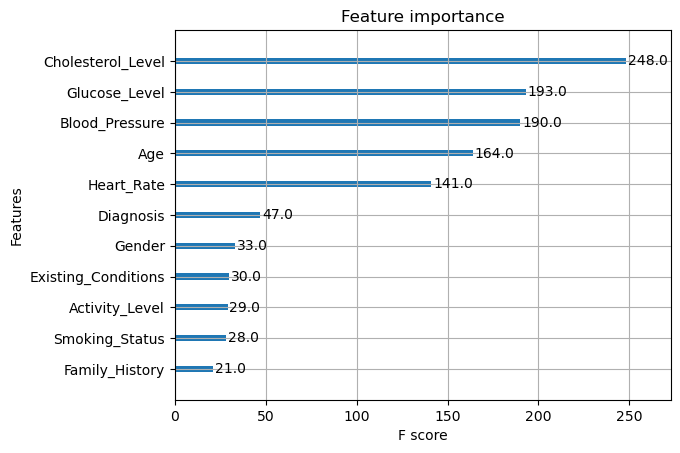

In [89]:
from xgboost import plot_importance

plot_importance(xgb_clf)
plt.show()

#plt.figure(figsize=(10, 8))
#plot_importance(xgb_clf, importance_type='weight', max_num_features=10)  # You can adjust importance_type as needed
#plt.title('Feature Importance')
#plt.show()

In [91]:
# create new set of data that includes the top 5 features impcting the result of the miodel


top_5 = ["Cholesterol_Level", "Glucose_Level", "Blood_Pressure", "Age", "Heart_Rate"]

# create a copy of the newly generated dataset

top_5 = clf_data[top_5]
top_5.head()

,Cholesterol_Level,Glucose_Level,Blood_Pressure,Age,Heart_Rate
Patient_ID,,,,,
2180,0.803477,-1.589712,-0.529015,-0.605003,-0.492459
2040,-0.743827,-0.148974,-0.222164,-0.942729,-0.666953
3747,1.149888,-0.869343,0.429894,-0.315523,-0.201637
744,0.295407,-0.282376,-0.874223,1.228371,1.601462
8248,-0.189569,0.117829,-0.260521,-0.846236,0.961653


In [99]:
# re-assign traun and test split to the top_5 data

X_train_clf, X_test_clf, y_train_clf,y_test_clf = train_test_split(top_5,y, test_size=0.2, random_state=42)
X_train_clf.shape, X_test_clf.shape,y_train_clf.shape, y_test_clf.shape

((1800, 5), (450, 5), (1800,), (450,))

In [95]:
# re apply xgboost classifier

xgb_clf = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=4)
xgb_clf.fit(X_train_clf, y_train_clf)
y_pred_xgb = xgb_clf.predict(X_test_clf)
 
# XGBoost Evaluation

print("XGBoost Classification Report:")
print(classification_report(y_test_clf, y_pred_xgb))
 
print(f"Training Score: {xgb_clf.score(X_train_clf, y_train_clf)}")
print(f"Test Score: {xgb_clf.score(X_test_clf, y_test_clf)}")

# the result drives home the point that the dataset itself makes it difficult to achieve anything. it keeps bringing us to overfitting issue

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.51      0.52       223
           1       0.54      0.57      0.55       227

    accuracy                           0.54       450
   macro avg       0.54      0.54      0.54       450
weighted avg       0.54      0.54      0.54       450

Training Score: 0.7661111111111111
Test Score: 0.54


In [101]:
#SVC Hyperparameter tuning
 
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [1]:
!pwd


'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import os
print(os.getcwd())


C:\Users\hey\OneDrive\Nebiant
